In [4]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import scipy, pylab
import sys

In [39]:
def peak_normalize(data):
    max_data = max(data)
    return data/(max_data*1.0)

def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x

In [42]:
window_size = 2048
overlap = 512
sample_frequency = 44.1

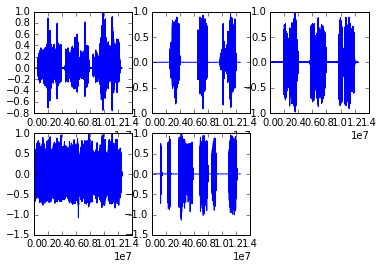

In [38]:
vocals = []
non_vocals = []

rate_01, data_01 = wavfile.read('./LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_01.wav','r')
rate_02, data_02 = wavfile.read('./LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_02.wav','r')
rate_03, data_03 = wavfile.read('./LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_03.wav','r')
rate_04, data_04 = wavfile.read('./LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_04.wav','r')
rate_05, data_05 = wavfile.read('./LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_05.wav','r')
# we are not concerned about second channel 
vocals.extend([data_01[:, 0], data_02[:, 0], data_03[:, 0]])
non_vocals.extend([data_04[:, 0], data_05[:, 0]])
# applying peak normalization
vocals = map(peak_normalize, vocals)
non_vocals = map(peak_normalize, non_vocals)
# plot signals
plt.figure(1)
f, axarr = plt.subplots(2, max(len(vocals), len(non_vocals)))
for i in range(len(vocals)):
    if i < len(vocals):
        axarr[0, i].plot(vocals[i])
    else:
        f.delaxes(axarr[0,i]) 
    if i < len(non_vocals):
        axarr[1, i].plot(non_vocals[i])
    else:
        f.delaxes(axarr[1,i]) 

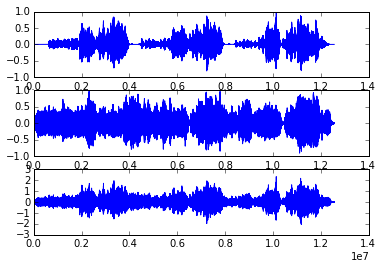

In [37]:
result_vocal = sum(vocals)
result_non_vocal = sum(non_vocals)
# Apply peak normalization
result_vocals = peak_normalize(result_vocal)
result_non_vocals = peak_normalize(result_non_vocal)
result = result_vocal + result_non_vocals
# Plot
f, axarr = plt.subplots(3)
axarr[0].plot(result_vocals)
axarr[1].plot(result_non_vocals)
axarr[2].plot(result)

In [53]:
# Take short time FT
vocals_ft = stft(result_vocals, sample_frequency, window_size, overlap)
non_vocals_ft = stft(result_non_vocals, sample_frequency, window_size, overlap)
result_ft = stft(result, sample_frequency, window_size, overlap)

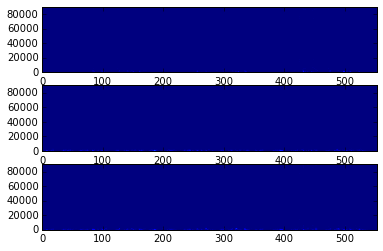

In [97]:
f, axarr = plt.subplots(3)
axarr[0].imshow(scipy.absolute(vocals_ft.T), aspect='auto', origin='lower', interpolation='nearest')
axarr[1].imshow(scipy.absolute(non_vocals_ft.T), aspect='auto', origin='lower', interpolation='nearest')
axarr[2].imshow(scipy.absolute(result_ft.T), aspect='auto', origin='lower', interpolation='nearest')

In [92]:
# Calculate binary mask
binary_mask = vocals_ft.T > non_vocals_ft.T
binary_mask = binary_mask.astype(int)

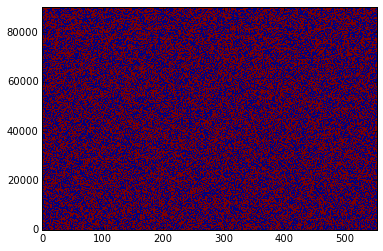

In [98]:
f, axarr = plt.subplots(1)
axarr.imshow(binary_mask, aspect='auto', origin='lower', interpolation='nearest')